<a href="https://colab.research.google.com/github/jessica-guan/Python-DataSci-ML/blob/main/Copy_of_TRAIN_YLC_Week_6_Lab_Notebook_%5BSTUDENT%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 6: Linear Regression Part I**
---

### **Description**
In this lab, you will learn how to build linear regression models using sklearn.

</br>

### **Lab Structure**
**Part 1**: [Boston Housing Dataset](#p1)

**Part 2**: [Diabetes Dataset](#p2)

</br>

### **Learning Objectives**
 By the end of this lab, you will:
1. Recognize what sklearn is and why we're using it.
2. Recognize how to implement Linear Regression models with sklearn.


</br>

### **Cheat Sheets**
* [Linear Regression with sklearn](https://docs.google.com/document/d/18NpkZHfcdrFd6IKBlZduMk_AWZiHgB3YsN7mLofTq-M/edit?usp=drive_link)

<br>

**Run the cell below to import the necessary libraries and functions.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, model_selection
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

<a name="p1"></a>

---
## **Part 1: Boston Housing Dataset**
---

#### **About the Dataset**
For a long time, House Price Index (HPI), which measures price changes of residential housing, has been used to predict the price of a specific house. However, HPI is focused on measuring the average price changes in repeat sales or refinancing on the same properties over time, meaning that many features, such as the house's district, age, or number or floors, are not considered. As a result of HPI's deficiencies, in recent years, Machine Learning techniques have been used to predict individual housing prices.


The Boston Housing Dataset is a collection of data that contains information on various features of houses in the Boston area, such as the number of rooms, the age of the house, and the distance to employment centers. The dataset contains 13 numerical features and a numerical target. It is often used for regression analysis and is a popular benchmark dataset for machine learning algorithms.

The features are as follows:

* `crim`: Per capita crime rate by town
* `zn`: Proportion of residential land zoned for lots over 25,000 sq. ft
* `indus`: Proportion of non-retail business acres per town
* `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* `nox`: Nitric oxide concentration (parts per 10 million)
* `RM`: Average number of rooms per dwelling
* `age`: Proportion of owner-occupied units built prior to 1940
* `dis`: Weighted distances to five Boston employment centers
* `rad`: Index of accessibility to radial highways
* `tax`: Full-value property tax rate per 10,000 dollars
* `ptratio`: Pupil-teacher ratio by town
* `b`: 1000(Bk — 0.63)², where Bk is the proportion [of people of African American descent] by town
* `LSTAT`: Percentage of lower status of the population
* **`TARGET`** (target that needs to be added): Median value of owner-occupied homes in $1000s. *You need to add this column after loading the Boston data from sklearn datasets*.

<br>

**NOTE**: The Boston housing prices dataset has a noted ethical problem: the authors of this dataset engineered a non-invertible variable “B” assuming that racial self-segregation had a positive impact on house prices. This variable is likely due to the practice of ['Redlining'](https://www.wgbh.org/news/local-news/2019/11/12/how-a-long-ago-map-created-racial-boundaries-that-still-define-boston) from the 1930s to 1970s in Boston, which has had long lasting affects in Boston still present today. The goal of the research that led to the creation of this dataset was to study the impact of air quality, but it did not give adequate demonstration of the validity of this assumption. Please know this data set is used for *practice only* and can serve as a good example of why ethical standards are so important for ML models and implementation. [Read more](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8) on problems existing within this data set and why it is not used for anything other than practicing ML.

<br>

#### **Your Task**
Using the Boston Housing dataset, we will do the following:
* Build a model that will predict the median value of owner-occupied homes for Boston in the 1970s;
* Use the model to predict the median value of houses with various room numbers and LSTAT scores.


#### **Step #1: Load the data**


In [ ]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)
df = df.rename(columns={'medv': 'TARGET', 'rm': 'RM', 'lstat':'LSTAT'})
df.head()

,crim,zn,indus,chas,nox,RM,age,dis,rad,tax,ptratio,b,LSTAT,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### **Step #2: Decide independent and dependent variables**


We are going to use "Rooms per dwelling" (`RM`) and "Percentage of lower status of the population" (`LSTAT`) as our independent variables for predicting `TARGET`. Our target is the median value of owner-occupied homes. **With these values, we are building a housing value predictor for Boston in the 1970s.** This step has already been done for you.

In [ ]:
df[["RM","LSTAT", "TARGET"]]

,RM,LSTAT,TARGET
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2
...,...,...,...
501,6.593,9.67,22.4
502,6.120,9.08,20.6
503,6.976,5.64,23.9
504,6.794,6.48,22.0



**Before we continue, we will create two graphs. One with `LSTAT` and the target, and another with `RM` and the target to explore the relationship between the variables further.**

Text(0, 0.5, 'target')

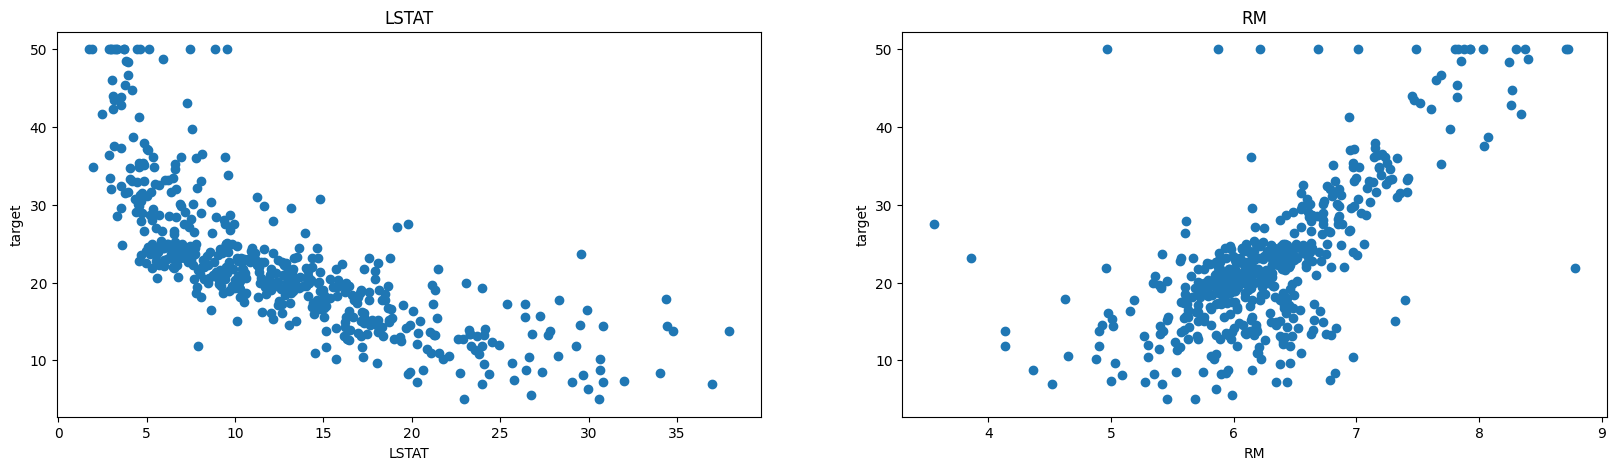

In [ ]:
plt.figure(figsize=(20, 5))

features = df[['LSTAT', 'RM']]
target = df['TARGET']

plt.subplot(1, 2, 1)
x = df["LSTAT"]
y = target
plt.scatter(x, y, marker='o')
plt.title("LSTAT")
plt.xlabel("LSTAT")
plt.ylabel('target')

plt.subplot(1, 2, 2)
x = df["RM"]
y = target
plt.scatter(x, y, marker='o')
plt.title("RM")
plt.xlabel("RM")
plt.ylabel('target')

#### **Step #3: Split data into training and testing data**

Specifically ensure the test set is 20% of the overall data. This will be the assumption moving forward.

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, test_size = 0.2)

#### **Step #4: Import your algorithm**


In [ ]:
# import that LinearRegression algorithm
from sklearn.linear_model import LinearRegression

#### **Step #5: Initialize your model and set hyperparameters**


Linear regression takes no hyperparameters, so we only need to initialize the model.

In [ ]:
model = LinearRegression()

#### **Step #6: Fit your model, test on the testing data, and create a visualization if applicable**

In [ ]:
model.fit(X_train, y_train)
pred = model.predict(X_test)

##### **Create a visualization**

Use `y_test` and your `prediction` (x and y on graph) from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be:
```
plt.plot([0, 50], [0, 50], '--k', label="Correct prediction")
```

This step has already been done for you.

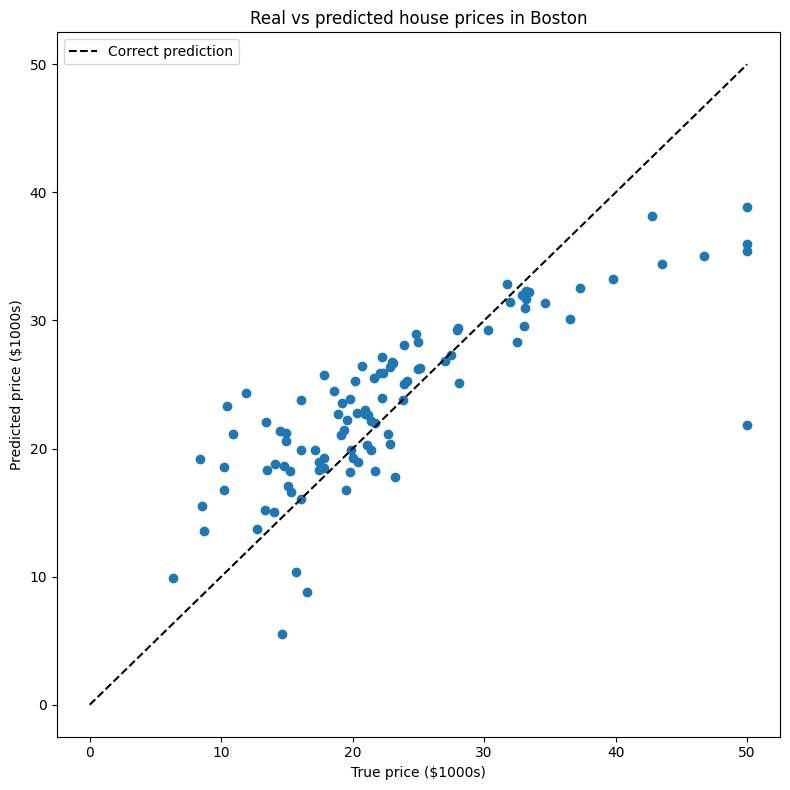

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, pred)
plt.plot([0, 50], [0, 50], '--k', label="Correct prediction")
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.title("Real vs predicted house prices in Boston")
plt.legend()
plt.tight_layout()

#### **Step #7: Evaluate your model**


Use mean squared error and the R2 score as the evaluation metrics.

In [ ]:
print('mean squared: ', mean_squared_error(y_test, pred))
print('R2 score: ', r2_score(y_test, pred))

mean squared:  34.09882770131724
R2 score:  0.6331680374849673


#### **Step #8: Use the model**

Using the model we created, predict the price of three houses in Boston:

* House 1:  7 rooms and LSTAT is 5.0%

* House 2:  6 rooms and LSTAT is 4.0%

* House 3: 8 rooms and LSTAT is 15.0%

**NOTE**: you must create a dataframe containing with the information of the new houses:

```python
new_houses = pd.DataFrame(enter_new_house_data_here, columns = ["RM", "LSTAT"])
```

This `new_houses` variable can then be placed directly into the `model.predict()` function.

In [ ]:
new_houses = pd.DataFrame({
    "LSTAT": [5.0, 4.0, 15.0],
    "RM": [7, 6, 8]
})

predicted_prices = model.predict(new_houses)
for i, price in enumerate(predicted_prices):
    print(f"Predicted price for House {i+1}: ${price:.2f} thousand")

Predicted price for House 1: $30.95 thousand
Predicted price for House 2: $26.53 thousand
Predicted price for House 3: $29.86 thousand


### **Reflection questions**
Answer the following questions:

1. How well did our model perform?
2. Would you rather buy House 1, House 2, or House 3? Why?

<a name="p2"></a>

---
## **Part 2: Diabetes Dataset**
---
#### **About the Dataset**
Diabetes is the 8th leading cause of death in the United States. More than 37 milion people in the U.S. have diabetes, and one in 5 of these individuals do not know it. This dataset contains data from diabetic patients with features such as their BMI, age, blood pressure, and glucose levels, which are useful in predicting the diabetes disease progression in patients. We will be looking at these variables to help predict disease progression in diabetic patients.

The features are as follows:
* `AGE`: age (in years)
* `SEX`
* `BMI`: body mass index
* `BP`: average blood pressure
* `S1`: tc, total serum cholesterol
* `S2`: ldl, low-density lipoproteins
* `S3`: hdl, high-density lipoproteins
* `S4`: tch, total cholesterol / HDL
* `S5`: ltg, possibly log of serum triglycerides level
* `S6`: glu, blood sugar level
* `Y`: quantitative measure of disease progression one year after baseline

**NOTE**: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times the square root of the number of samples (i.e. the sum of squares of each column totals 1).

#### **Your Task**
Using the Diabetes dataset, you will do the following:
* Build a model that will predict disease progression in diabetic patients;
* Predict the disease progression of a patient with various ages, BMIs, and blood pressures.

#### **Step #1: Load the data**

In [ ]:
file = "https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt"
df = pd.read_table(file, header=0, delim_whitespace=True)
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


#### **Step #2: Decide independent and dependent variables**

Here we would like to use the `AGE` `BMI` and `BP` columns as our independent variables and `Y` as our dependent variable.

We are building a predictor of disease progression.


In [ ]:
features = df[["AGE","BMI", "BP"]]
labels = df[["Y"]]

#### **Step #3: Split data into training and testing data**

Use `AGE`, `BMI`, and `BP` for our independent variables.

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(features, labels, test_size=0.2)

#### **Step #4: Import your model**

In [ ]:
from sklearn.linear_model import LinearRegression

#### **Step #5: Initialize your model and set hyperparameters**


Linear regression takes no hyperparameters, so just initialize the model.

In [ ]:
model = LinearRegression()

#### **Step #6: Fit your model, test on the testing data, and create a visualization if applicable**

In [ ]:
model.fit(X_train, y_train)
model.predict(X_test)

array([[291.14623014],
       [255.19536818],
       [168.0669954 ],
       [ 94.99708161],
       [185.05548534],
       [142.1821753 ],
       [218.80541412],
       [ 56.40903117],
       [152.29752132],
       [151.49882825],
       [209.89211846],
       [142.78011927],
       [186.20415028],
       [124.12354444],
       [224.02538609],
       [109.97908403],
       [279.69594663],
       [162.50683502],
       [128.56938921],
       [168.39231753],
       [148.26065217],
       [115.00715174],
       [196.44304973],
       [208.01920321],
       [179.52794097],
       [103.03426364],
       [ 97.64701332],
       [263.64761777],
       [211.97360809],
       [ 72.02581583],
       [187.37573631],
       [221.29055641],
       [ 87.54080754],
       [151.28783545],
       [128.12835694],
       [136.10021842],
       [ 81.84573131],
       [129.96429292],
       [171.43118246],
       [ 93.12707364],
       [179.56565783],
       [146.89171318],
       [282.31326233],
       [143

##### **Create a visualization**

Use `y_test` and your `prediction` from the model to create a scatter plot. Then use the following line to visualize where a correct prediction would be. The code has already been given to you.
```
plt.plot([0, 300], [0, 300], '--k', label="Correct prediction")
```

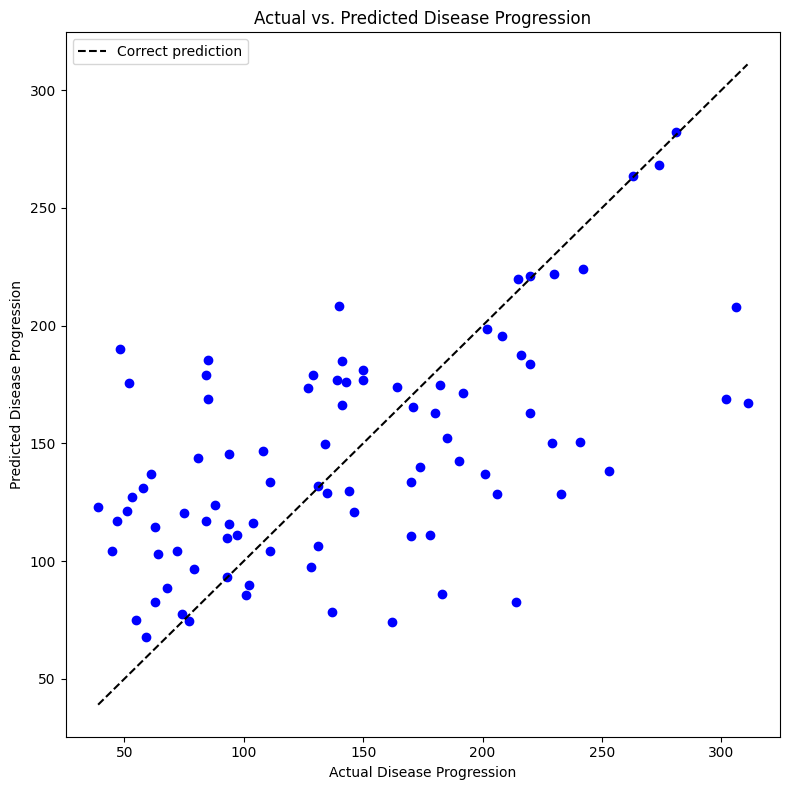

In [ ]:
plt.figure(figsize=(8, 8))

plt.scatter(y_test, target, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', label="Correct prediction")

plt.axis('tight')

plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Disease Progression")
plt.title("Actual vs. Predicted Disease Progression")

plt.legend()
plt.tight_layout()
plt.show()

#### **Step #7: Evaluate your model**

Use mean squared error and the R2 score as the evaluation metrics.


In [ ]:
mse_train = mean_squared_error(y_train, model.predict(X_train))
print('Mean Squared Error (MSE) on Training Set:', mse_train)
r_squared_train = r2_score(y_train, model.predict(X_train))
print('R-squared (R^2) on Training Set:', r_squared_train)

Mean Squared Error (MSE) on Training Set: 3659.0051660463023
R-squared (R^2) on Training Set: 0.4077156165391498


#### **Step #8: Use the model**

Using the model we created, predict the disease progression of two new patients:

* Patient 1:  age 45, bmi of 26.3, and average blood pressure of 98

* Patient 2:  age 39, bmi of 22.7, and average blood pressure of 114

**NOTE**: you must create a dataframe containing with the information of the new patients:

```python
new_patient_data = pd.DataFrame(new_patient_data_here, columns =["AGE", "BMI", "BP"])
```

In [ ]:
new_patient_data = pd.DataFrame({
    "AGE": [45, 39],
    "BMI": [26.3, 22.7],
    "BP": [98, 114]
}, columns=["AGE", "BMI", "BP"])
predicted_progression = model.predict(new_patient_data)
for i, progression in enumerate(predicted_progression):
    print(f"Predicted Disease Progression for Patient {i+1}: {progression[0]:.2f}")

Predicted Disease Progression for Patient 1: 154.51
Predicted Disease Progression for Patient 2: 142.64


### **Reflection questions**
Answer the following questions based on the scatter plot:

1. Does your model tend to overpredict or underpredict for a true progression value less than 150?
2. Does your model tend to overpredict or underpredict for a true progression value above 150?

---
#End of Notebook

© 2023 The Coding School, All rights reserved